#Data preprocessing



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Load data from CSV
data = pd.read_csv('preprocessing.csv')

# Display the original data
print("Original Data:")
print(data)
print()

# 1. Imputation using mean for missing values
data_imputed = data.fillna(data.mean())

print("Imputed Data:")
print(data_imputed)
print()

# 2. Anomaly detection (here using a simple threshold-based approach)
threshold = 2  # Set the anomaly threshold
anomaly_mask = (data_imputed - data_imputed.mean()).abs() > threshold * data_imputed.std()
anomaly_indices = anomaly_mask.any(axis=1)

print("Anomaly Indices:")
print(anomaly_indices)
print()

# 3. Standardization
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_imputed[['A', 'B', 'C']])

print("Standardized Data:")
print(data_standardized)
print()

# 4. Normalization
min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data_imputed[['A', 'B', 'C']])

print("Normalized Data:")
print(data_normalized)
print()

# 5. Encoding of categorical data
label_encoder = LabelEncoder()
data_encoded = label_encoder.fit_transform(data_imputed['Category'])

print("Encoded Category:")
print(data_encoded)


Original Data:
     A    B    C Category
0  1.0  2.0  NaN      Red
1  NaN  3.0  4.0     Blue
2  5.0  NaN  6.0    Green
3  7.0  8.0  9.0      Red

Imputed Data:
          A         B         C Category
0  1.000000  2.000000  6.333333      Red
1  4.333333  3.000000  4.000000     Blue
2  5.000000  4.333333  6.000000    Green
3  7.000000  8.000000  9.000000      Red

Anomaly Indices:
0    False
1    False
2    False
3    False
dtype: bool

Standardized Data:
[[-1.5430335  -1.02652981  0.        ]
 [ 0.         -0.58658846 -1.31122014]
 [ 0.3086067   0.         -0.18731716]
 [ 1.2344268   1.61311827  1.4985373 ]]

Normalized Data:
[[0.         0.         0.46666667]
 [0.55555556 0.16666667 0.        ]
 [0.66666667 0.38888889 0.4       ]
 [1.         1.         1.        ]]

Encoded Category:
[2 0 1 2]


<ipython-input-27-2d14d393b68d>:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_imputed = data.fillna(data.mean())
<ipython-input-27-2d14d393b68d>:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anomaly_mask = (data_imputed - data_imputed.mean()).abs() > threshold * data_imputed.std()
<ipython-input-27-2d14d393b68d>:21: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid 

In [ ]:
#Without library

import numpy as np

# Sample data with missing values
data = np.array([[1, 2], [np.nan, 3], [4, np.nan], [5, 6]])

# Imputation - filling missing values with mean
means = np.nanmean(data, axis=0)
imputed_data = np.where(np.isnan(data), np.expand_dims(means, axis=0), data)

print("Imputed Data:")
print(imputed_data)


#Without library

# Sample data
data = np.random.randn(100, 2)

# Introduce an anomaly
data[0] = 10 * np.random.randn(2)

# Anomaly detection using standard deviation
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
threshold = 3  # Adjust the threshold for anomaly detection

anomalies = np.abs((data - mean) / std) > threshold
anomaly_indices = np.any(anomalies, axis=1)

print("Anomaly Indices:")
print(anomaly_indices)


# Sample data
data = np.array([[1, 2], [3, 4], [5, 6]])

# Standardization
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
standardized_data = (data - means) / stds

print("Standardized Data:")
print(standardized_data)

# Sample data
data = np.array([[1, 2], [3, 4], [5, 6]])

# Normalization
mins = np.min(data, axis=0)
maxs = np.max(data, axis=0)
normalized_data = (data - mins) / (maxs - mins)

print("Normalized Data:")
print(normalized_data)

# Sample categorical data
data = ['red', 'blue', 'green', 'blue', 'red']

# Encoding
unique_labels = list(set(data))
label_map = {label: idx for idx, label in enumerate(unique_labels)}
encoded_data = [label_map[label] for label in data]

print("Encoded Data:")
print(encoded_data)




Imputed Data:
[[1.         2.        ]
 [3.33333333 3.        ]
 [4.         3.66666667]
 [5.         6.        ]]
Imputed Data:
[[1.         2.        ]
 [3.33333333 3.        ]
 [4.         3.66666667]
 [5.         6.        ]]


#Gradient descent algorithm

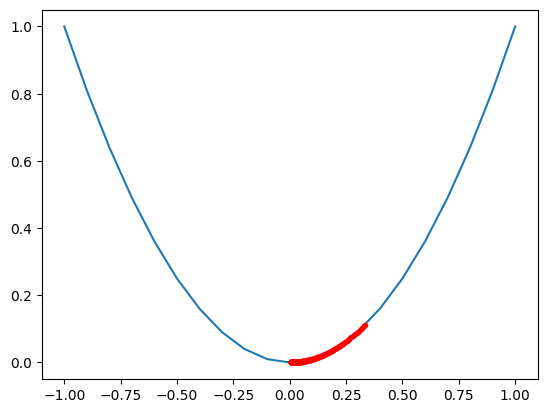

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def objective(x):
    return x**2.0

def derivative(x):
    h = 1e-6
    return (objective(x + h) - objective(x - h)) / (2*h)

def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    solutions, scores = [], []
    solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])

    for _ in range(n_iter):
        gradient = derivative(solution)
        solution = solution - step_size * gradient
        solution_eval = objective(solution)
        solutions.append(solution)
        scores.append(solution_eval)

    return solutions, scores

bounds = np.array([[-1.0, 1.0]])
n_iter = 200
step_size = 0.01
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)

inputs = np.arange(bounds[0, 0], bounds[0, 1] + 0.1, 0.1)
results = objective(inputs)

plt.plot(inputs, results)
plt.plot(solutions, scores, '.-', color='red')
plt.show()


#Linear regression (simple and multiple)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
Mean Squared Error: 3.3509887213291782
Mean Absolute Error: 1.4149258169276044
R-squared: 0.8296690596780842


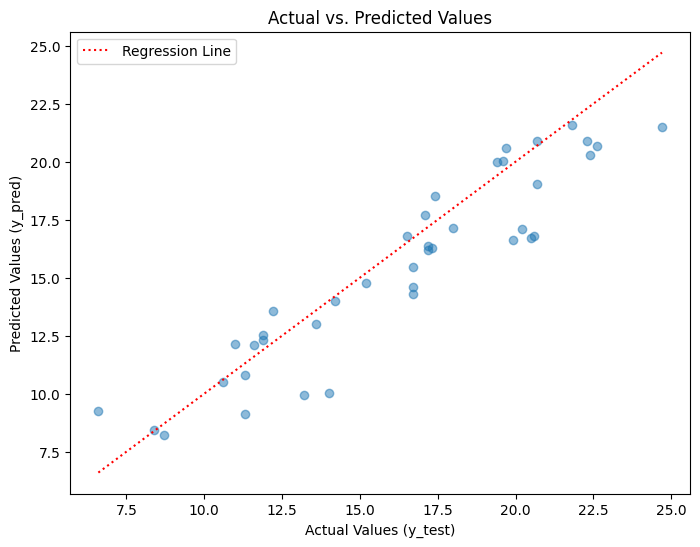

In [ ]:
#https://www.kaggle.com/code/mtalhazafar/sales-forecasting-by-linear-regression/notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("advertising.csv")
print(df)

df.info()
df.describe()
df.isnull().sum()

X = df[['TV', 'Newspaper', 'Radio']] #Multiple
# X = df[['TV']] # Linear
y = df['Sales']
X.head()
y.head()

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=100)

model = LinearRegression()
model.fit(X_train , y_train )
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
regression_line_x = np.linspace(min(y_test), max(y_test), 100)
regression_line_y = regression_line_x
plt.plot(regression_line_x, regression_line_y, color='red', linestyle=':', label="Regression Line")
plt.legend()
plt.show()


#Logistics regression

In [ ]:
#https://www.kaggle.com/code/amolambkar/iris-data-logistic-regression
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('Iris.csv')
print(data.head()) #print first 5 rows of dataset

print(data.columns)
data.info()



data.drop('Id',axis=1,inplace=True)



train , test = train_test_split(data,test_size=0.2,random_state=0)

print('shape of training data : ',train.shape)
print('shape of testing data',test.shape)

train_x = train.drop(columns=['Species'],axis=1)
train_y = train['Species']

test_x = test.drop(columns=['Species'],axis=1)
test_y = test['Species']

model = LogisticRegression(solver='liblinear')
model.fit(train_x,train_y)

predict = model.predict(test_x)

print('Predicted Values on Test Data',predict)

print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(test_y,predict))


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   S

#Decision tree

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   meant     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: meant, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

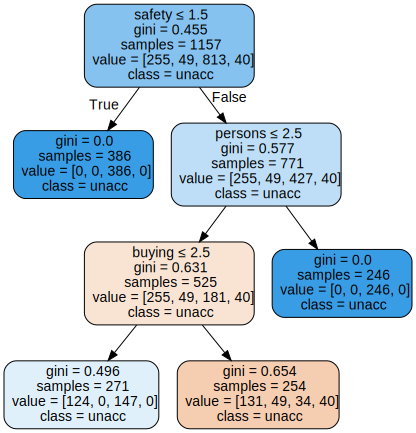

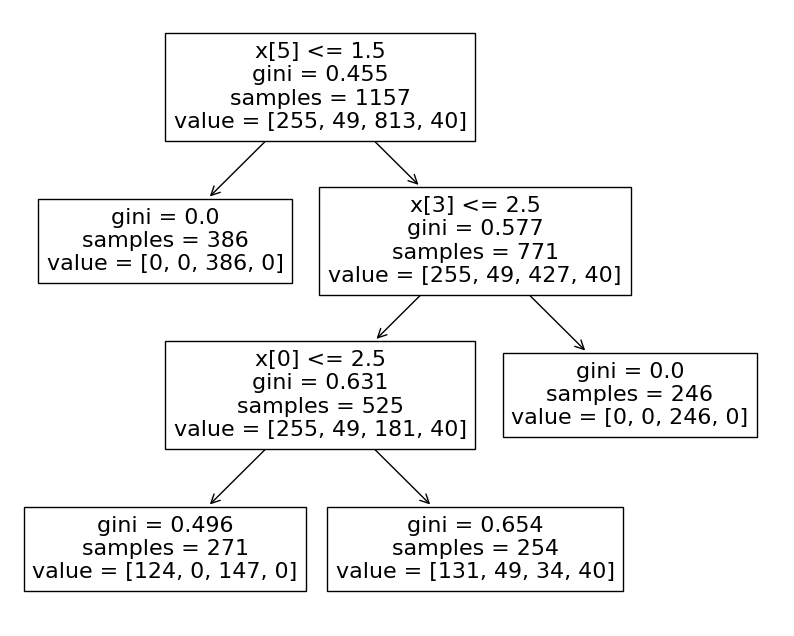

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

data = 'car_evaluation.csv'
df = pd.read_csv(data, header=None)

# Rename the column
col_names = ['buying', 'meant', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names
df.head()
df.info()

for col in col_names:
    print(df[col].value_counts())

df['class'].value_counts()

df.isnull().sum()

X = df.drop(['class'], axis=1)

y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=42)

X_train.shape, X_test.shape

# Encode Categorical
# !pip install category_encoders
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'meant', 'doors', 'persons', 'lug_boot', 'safety'])

# label_encoder = LabelEncoder()
# data_encoded = label_encoder.fit_transform(X_train)


X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)
y_pred_gini[:5]

# Check Accuracy score
from sklearn.metrics import accuracy_score

print("Model Accuracy score with criterion gini index {0:0.4f}"
      .format(accuracy_score(y_pred_gini, y_test)))

y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

print("Model Accuracy score with criterion gini index {0:0.4f}"
      .format(accuracy_score(y_pred_train_gini, y_train)))

print("Model Accuracy score with criterion gini index for test dataset {0:0.4f}"
      .format(accuracy_score(y_pred_gini, y_test)))
print("Model Accuracy score with criterion gini index for train dataset {0:0.4f}"
      .format(accuracy_score(y_pred_train_gini, y_train)))

plt.figure(figsize=(10, 8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))


import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

#SVM

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



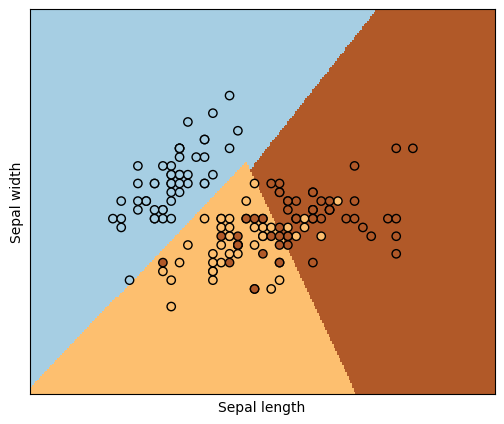

In [ ]:
#https://www.kaggle.com/code/funxexcel/p1-sklearn-svm-model

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Initialize and fit the SVM model (using a linear kernel for simplicity)
svm = SVC(kernel='linear')
svm.fit(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate precision, recall, and F1-score for each class
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


# Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = .02  # Step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()




#Ensemble

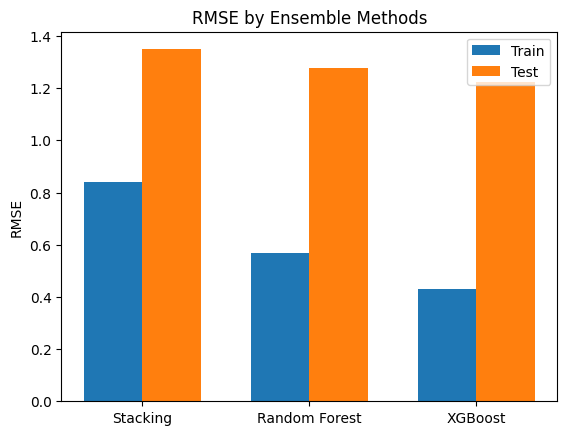

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('advertising.csv')

# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

# Split into features and target variable
X = df.drop(columns=['Sales'])
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stacking
base_models = [('lasso', Lasso()), ('ridge', Ridge()), ('knn', KNeighborsRegressor()), ('svr', SVR()), ('dt', DecisionTreeRegressor())]
meta_model = Ridge()
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_regressor.fit(X_train, y_train)
y_train_pred_stack = stacking_regressor.predict(X_train)
y_test_pred_stack = stacking_regressor.predict(X_test)

# Bagging - Random Forest
random_forest_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
random_forest_regressor.fit(X_train, y_train)
y_train_pred_rf = random_forest_regressor.predict(X_train)
y_test_pred_rf = random_forest_regressor.predict(X_test)

# Boosting - XGBoost
xgb_regressor = xgb.XGBRegressor(n_estimators=10, random_state=42)
xgb_regressor.fit(X_train, y_train)
y_train_pred_xgb = xgb_regressor.predict(X_train)
y_test_pred_xgb = xgb_regressor.predict(X_test)

# Evaluation Metrics - RMSE for train and test sets
rmse_stacking_train = np.sqrt(mean_squared_error(y_train, y_train_pred_stack))
rmse_stacking_test = np.sqrt(mean_squared_error(y_test, y_test_pred_stack))

rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

rmse_boosting_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_boosting_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

# Create bar plots to compare RMSE of different ensemble methods on both training and test sets
labels = ['Stacking', 'Random Forest', 'XGBoost']
rmse_train = [rmse_stacking_train, rmse_rf_train, rmse_boosting_train]
rmse_test = [rmse_stacking_test, rmse_rf_test, rmse_boosting_test]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rmse_train, width, label='Train')
rects2 = ax.bar(x + width/2, rmse_test, width, label='Test')

ax.set_ylabel('RMSE')
ax.set_title('RMSE by Ensemble Methods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


#PCA

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

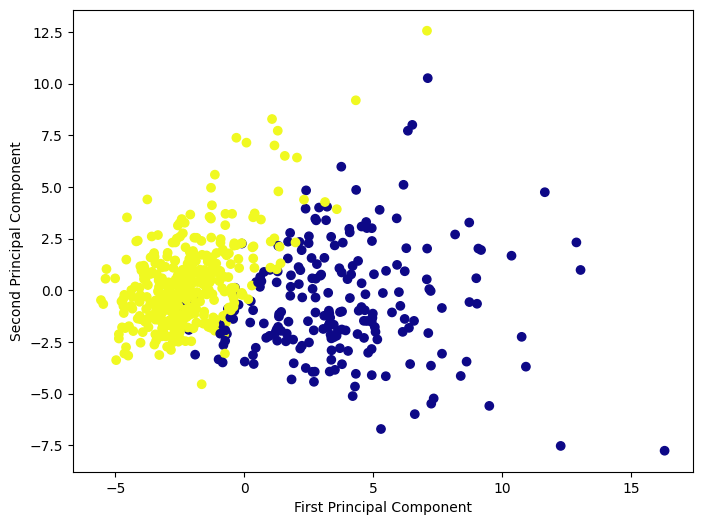

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# Load the breast cancer dataset
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame

print(df)

# Input features
X = df[cancer.feature_names]

# Standardization
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std

# Specify the number of principal components
n_components = 2

# Perform PCA
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(Z)

# Create a new dataframe for the principal components
df_pca = pd.DataFrame(x_pca, columns=['PC{}'.format(i + 1) for i in range(n_components)])

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer.target, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
